# Import Packages

In [60]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as keras_layer, Sequential, optimizers, losses, callbacks
from tensorflow.data import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error,mean_squared_error, r2_score, f1_score, accuracy_score, mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error, explained_variance_score, balanced_accuracy_score, precision_score, recall_score, matthews_corrcoef
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC, NuSVC, LinearSVC
from mpl_toolkits.mplot3d import Axes3D
import cv2
import os
import sklearn
import skimage
import glob
import random
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline as sklearn_pipeline

In [2]:
tf.__version__

'2.18.0'

# Import Data From Kaggle

In [3]:
!chmod 600 ~/ /content/drive/MyDrive/Hackathons/kaggle

In [4]:
!kaggle datasets download -d ankushpanday2/oral-cancer-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/ankushpanday2/oral-cancer-prediction-dataset
License(s): MIT
  0% 0.00/2.15M [00:00<?, ?B/s]
100% 2.15M/2.15M [00:00<00:00, 98.1MB/s]


In [5]:
!unzip /content/oral-cancer-prediction-dataset.zip

Archive:  /content/oral-cancer-prediction-dataset.zip
  inflating: oral_cancer_prediction_dataset.csv  


# Import The Unzip CSV Data

In [6]:
df = pd.read_csv("/content/oral_cancer_prediction_dataset.csv")

In [7]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


# Visualized The Data Relations

In [8]:
df_numeric = df.copy()
for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':
        df_numeric[col] = pd.factorize(df_numeric[col])[0]

In [9]:
sns.set(style="whitegrid")

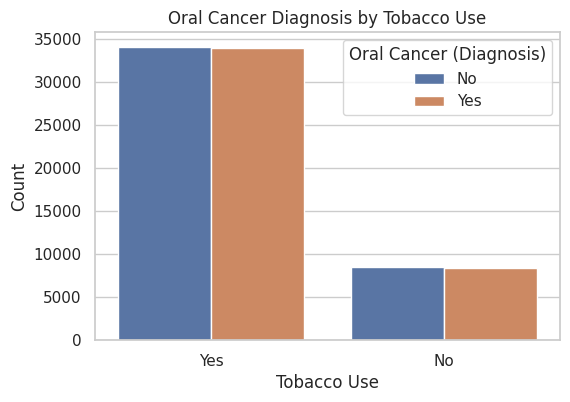

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Tobacco Use", hue="Oral Cancer (Diagnosis)", data=df)
plt.title("Oral Cancer Diagnosis by Tobacco Use")
plt.xlabel("Tobacco Use")
plt.ylabel("Count")
plt.show()

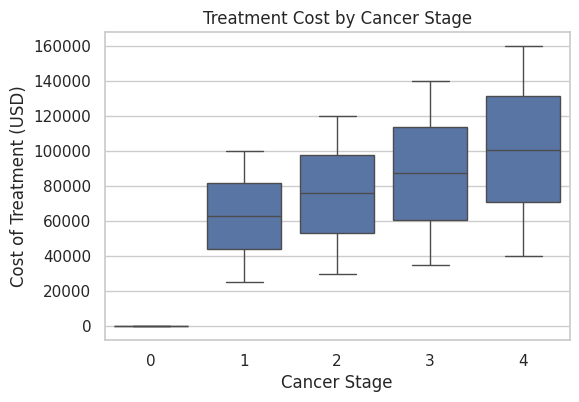

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Cancer Stage", y="Cost of Treatment (USD)", data=df)
plt.title("Treatment Cost by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Cost of Treatment (USD)")
plt.show()

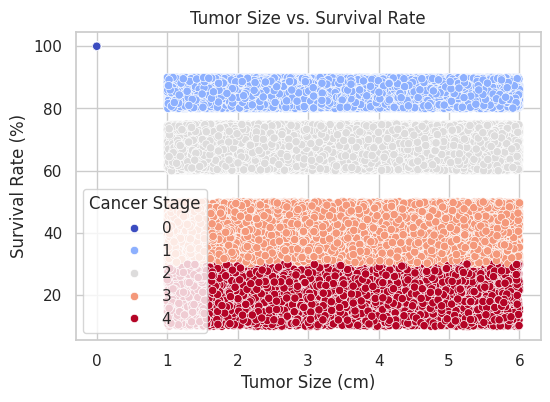

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Tumor Size (cm)", y="Survival Rate (5-Year, %)", hue="Cancer Stage", data=df, palette="coolwarm")
plt.title("Tumor Size vs. Survival Rate")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Survival Rate (%)")
plt.show()

# Preprocess The Data Frame

In [15]:
df.isna().sum()

,0
ID,0
Country,0
Age,0
Gender,0
Tobacco Use,0
Alcohol Consumption,0
HPV Infection,0
Betel Quid Use,0
Chronic Sun Exposure,0
Poor Oral Hygiene,0


## Fill Out Missing Values

In [16]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [17]:
df.head(1)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.0,0,No Treatment,100.0,0.0,0,No,No


## Label Encode Non Number Values

In [18]:
label_encoder = LabelEncoder()

In [19]:
for col in df.select_dtypes(include="object").columns:
  df[col] = label_encoder.fit_transform(df[col])

In [20]:
df.head(1)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,6,36,0,1,1,1,0,0,1,...,0,0,0.0,0,1,100.0,0.0,0,0,0


## Normalized Numerics Features

In [21]:
scaler = MinMaxScaler()

In [22]:
numerical_cols = ["Age", "Tumor Size (cm)", "Cost of Treatment (USD)", "Economic Burden (Lost Workdays per Year)"]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [23]:
df.head(1)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,6,0.244186,0,1,1,1,0,0,1,...,0,0,0.0,0,1,100.0,0.0,0.0,0,0


In [24]:
df.drop(["ID", "Country"], axis =1, inplace=True)

In [25]:
df.head(1)

,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,0.244186,0,1,1,1,0,0,1,1,0,...,0,0,0.0,0,1,100.0,0.0,0.0,0,0


# Split Into X and y

In [26]:
X = df.drop("Oral Cancer (Diagnosis)", axis = 1).to_numpy()

In [27]:
X[0]

array([  0.24418605,   0.        ,   1.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        , 100.        ,   0.        ,
         0.        ,   0.        ])

In [28]:
y = df["Oral Cancer (Diagnosis)"].to_numpy()

In [29]:
y[0]

0

# Split Train And Test Dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42
    )

In [31]:
len(X_train), len(y_train), len(X_test), len(y_test)

(67937, 67937, 16985, 16985)

# Make Model Pipeline

In [45]:
voting_clf = VotingClassifier(
    estimators=[
      ("random_forest" , RandomForestClassifier()),
      ("logistic_regression", LogisticRegression()),
      ("svm", SVC(probability=True)),
      ("decision_tree", DecisionTreeClassifier())
    ],
    voting="soft"
)

In [74]:
model_pipeline = sklearn_pipeline([
    ("classifier", voting_clf)
])

In [75]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 VotingClassifier(estimators=[('random_forest',
                                               RandomForestClassifier()),
                                              ('logistic_regression',
                                               LogisticRegression()),
                                              ('svm', SVC(probability=True)),
                                              ('decision_tree',
                                               DecisionTreeClassifier())],
                                  voting='soft'))])

In [76]:
%time
model_preds_probs = model_pipeline.predict(
  X_test
  )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [77]:
model_preds_probs[:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [78]:
y_test[:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [79]:
def evaluate_model(y_true, y_pred):
    metrics = {}

    metrics["MAE"] = mean_absolute_error(y_true, y_pred)
    metrics["MSE"] = mean_squared_error(y_true, y_pred)
    metrics["RMSE"] = np.sqrt(metrics["MSE"])
    metrics["MSLE"] = mean_squared_log_error(y_true, np.maximum(y_pred, 0))
    metrics["MAPE"] = mean_absolute_percentage_error(y_true, y_pred)
    metrics["MedAE"] = median_absolute_error(y_true, y_pred)
    metrics["R2"] = r2_score(y_true, y_pred)
    metrics["Explained Variance"] = explained_variance_score(y_true, y_pred)

    return metrics

In [80]:
model_results = evaluate_model(y_test, model_preds_probs)

In [81]:
model_results

{'MAE': 0.0,
 'MSE': 0.0,
 'RMSE': 0.0,
 'MSLE': 0.0,
 'MAPE': 0.0,
 'MedAE': 0.0,
 'R2': 1.0,
 'Explained Variance': 1.0}

In [82]:
y_test_np = np.array(y_test)
y_pred_np = np.array(model_preds_probs)

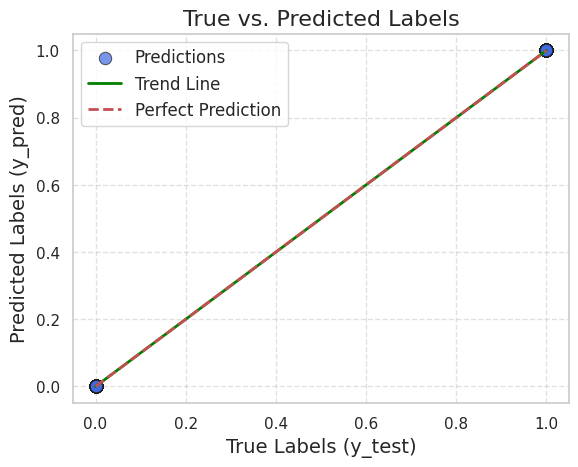

In [83]:
sns.scatterplot(x=y_test_np, y=y_pred_np, alpha=0.7, edgecolors='k', color="royalblue", s=80, label="Predictions")

sns.regplot(x=y_test_np, y=y_pred_np, scatter=False, color='green', line_kws={"lw": 2}, label="Trend Line")

plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2, label="Perfect Prediction")

plt.xlabel("True Labels (y_test)", fontsize=14)
plt.ylabel("Predicted Labels (y_pred)", fontsize=14)
plt.title("True vs. Predicted Labels", fontsize=16)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

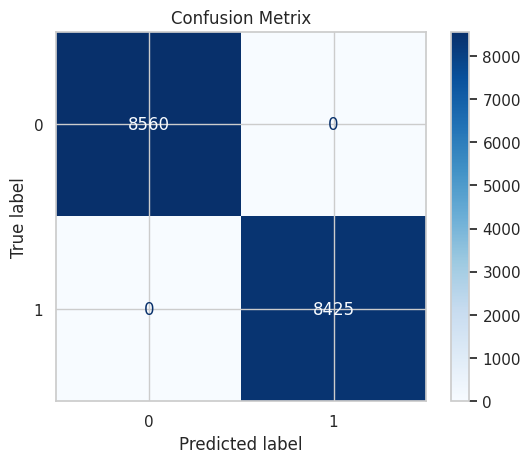

In [84]:
cm = confusion_matrix(y_test, model_preds_probs)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Metrix")
plt.show()